<a href="https://colab.research.google.com/github/praneethalla/project/blob/main/project_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

# Load data
data = pd.read_csv('/content/AAPL.csv')

# Select features and target
features = data[['Open', 'High', 'Low', 'Close', 'Adj Close']]
target = data['Volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=1.0)
svr = SVR()
knn_reg = KNeighborsRegressor()

# Apply PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

models = [linear_reg, ridge_reg, lasso_reg, svr, knn_reg]
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'SVR', 'KNN Regression']

# Perform bootstrapping and evaluate models
n_bootstrap_samples = 100
mse_scores = []

for model, model_name in zip(models, model_names):
    mse_scores_without_pca = []
    mse_scores_with_pca = []

    for _ in range(n_bootstrap_samples):
        X_train_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, n_samples=len(X_train))
        model.fit(X_train_bootstrap, y_train_bootstrap)
        y_pred = model.predict(X_test_scaled)
        mse_without_pca = mean_squared_error(y_test, y_pred)

        model.fit(X_train_pca, y_train_bootstrap)
        y_pred_pca = model.predict(X_test_pca)
        mse_with_pca = mean_squared_error(y_test, y_pred_pca)

        mse_scores_without_pca.append(mse_without_pca)
        mse_scores_with_pca.append(mse_with_pca)

    avg_mse_without_pca = np.mean(mse_scores_without_pca)
    avg_mse_with_pca = np.mean(mse_scores_with_pca)

    mse_scores.append((model_name, avg_mse_without_pca, avg_mse_with_pca))

# Find the best model based on the lowest MSE
best_model = min(mse_scores, key=lambda x: x[1] + x[2])

print(f"Best Model: {best_model[0]}")
print(f"Avg MSE without PCA: {best_model[1]}")
print(f"Avg MSE with PCA: {best_model[2]}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.693e+17, tolerance: 2.997e+14
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.129e+18, tolerance: 3.575e+14
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.336e+17, tolerance: 3.127e

Best Model: Linear Regression
Avg MSE without PCA: 1409598090016547.2
Avg MSE with PCA: 2934794121940427.5


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.355e+17, tolerance: 3.079e+14
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.391e+17, tolerance: 2.923e+14
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.558e+17, tolerance: 3.234e

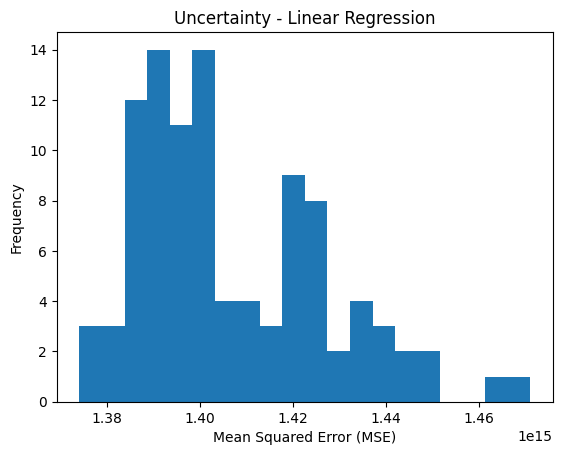

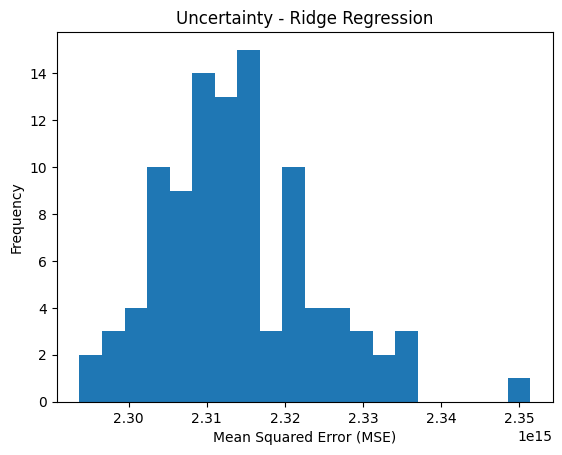

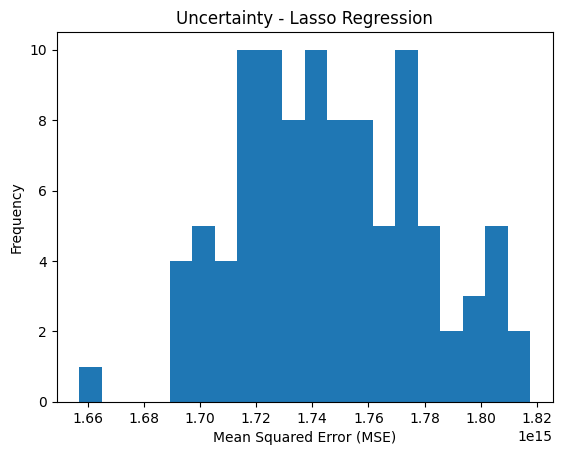

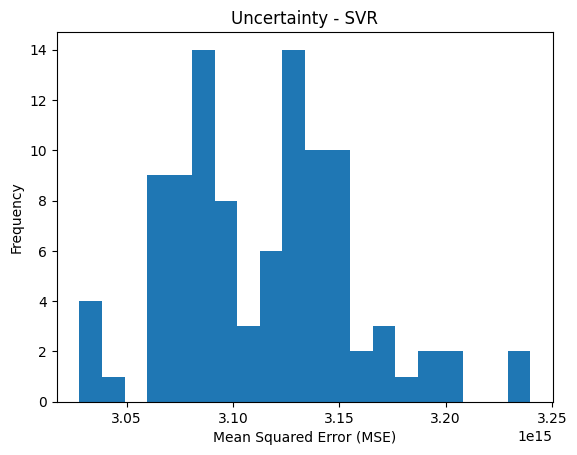

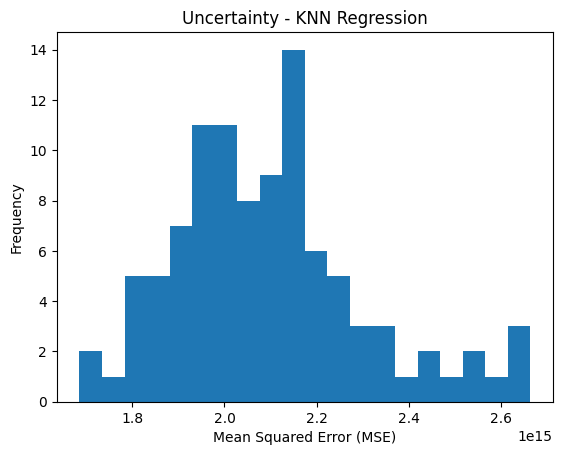

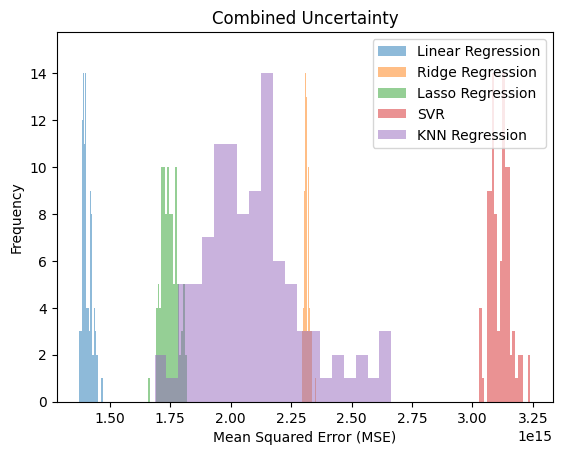

In [24]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/content/AAPL.csv')

# Select features and target
features = data[['Open', 'High', 'Low', 'Close', 'Adj Close']]
target = data['Volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=1.0)
svr = SVR()
knn_reg = KNeighborsRegressor()

models = [linear_reg, ridge_reg, lasso_reg, svr, knn_reg]
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'SVR', 'KNN Regression']

# Perform bootstrapping and evaluate models
n_bootstrap_samples = 100
mse_scores = []

uncertainty_data = {}  # Store uncertainty data for each model

for model, model_name in zip(models, model_names):
    mse_scores_without_pca = []

    for _ in range(n_bootstrap_samples):
        X_train_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, n_samples=len(X_train))
        model.fit(X_train_bootstrap, y_train_bootstrap)
        y_pred = model.predict(X_test_scaled)
        mse_without_pca = mean_squared_error(y_test, y_pred)

        mse_scores_without_pca.append(mse_without_pca)

    uncertainty_data[model_name] = mse_scores_without_pca

# Plot uncertainty graphs for each model
for model_name, mse_scores in uncertainty_data.items():
    plt.figure()
    plt.hist(mse_scores, bins=20)
    plt.title(f'Uncertainty - {model_name}')
    plt.xlabel('Mean Squared Error (MSE)')
    plt.ylabel('Frequency')

# Combine uncertainty graphs for all models
plt.figure()
for model_name, mse_scores in uncertainty_data.items():
    plt.hist(mse_scores, bins=20, alpha=0.5, label=model_name)
plt.title('Combined Uncertainty')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Frequency')
plt.legend()

plt.show()
